# Univariate Analysis (Mean Squared Error (MSE))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("saleprice.csv")

In [3]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [4]:
df.shape

(1460, 37)

In [5]:
df.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [6]:
df.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
X = df.iloc[:, 0:36]
y = df.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                   random_state=123)

In [11]:
mse_values = []
for feature in X_train.columns:
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

In [12]:
mse_values

[1058182017.4752291,
 1015487344.5912703,
 956598807.0178654,
 1010529565.8485065,
 1012727529.6549236,
 1022460219.12894,
 968605985.1335924,
 1097458119.3724177,
 1028128282.3954511,
 1042783038.5777225,
 1082239358.5553298,
 1036220356.7609776,
 1020597792.4369426,
 1051937014.7132227,
 1075333290.8956792,
 1071956756.4595194,
 975653343.5104179,
 1023833957.1703414,
 1028027104.5801475,
 1034348325.4960829,
 990131739.3894166,
 1011545269.207183,
 956496094.3047619,
 1014665003.3624291,
 1001059969.266974,
 998186695.5794051,
 969214982.0726943,
 1024583174.5007364,
 1013405644.995437,
 1000678212.7571586,
 1046072060.214121,
 994807546.5591294,
 1057987393.8284981,
 973175120.9819887,
 1010615267.6629008,
 968420989.8357488]

In [13]:
mse_values = pd.Series(mse_values)

In [14]:
mse_values.index = X_train.columns

In [15]:
mse_values

MSSubClass       1.058182e+09
LotFrontage      1.015487e+09
LotArea          9.565988e+08
OverallQual      1.010530e+09
OverallCond      1.012728e+09
YearBuilt        1.022460e+09
YearRemodAdd     9.686060e+08
MasVnrArea       1.097458e+09
BsmtFinSF1       1.028128e+09
BsmtFinSF2       1.042783e+09
BsmtUnfSF        1.082239e+09
TotalBsmtSF      1.036220e+09
1stFlrSF         1.020598e+09
2ndFlrSF         1.051937e+09
LowQualFinSF     1.075333e+09
GrLivArea        1.071957e+09
BsmtFullBath     9.756533e+08
BsmtHalfBath     1.023834e+09
FullBath         1.028027e+09
HalfBath         1.034348e+09
BedroomAbvGr     9.901317e+08
KitchenAbvGr     1.011545e+09
TotRmsAbvGrd     9.564961e+08
Fireplaces       1.014665e+09
GarageYrBlt      1.001060e+09
GarageCars       9.981867e+08
GarageArea       9.692150e+08
WoodDeckSF       1.024583e+09
OpenPorchSF      1.013406e+09
EnclosedPorch    1.000678e+09
3SsnPorch        1.046072e+09
ScreenPorch      9.948075e+08
PoolArea         1.057987e+09
MiscVal   

In [16]:
mse_values.sort_values(ascending=False)

MasVnrArea       1.097458e+09
BsmtUnfSF        1.082239e+09
LowQualFinSF     1.075333e+09
GrLivArea        1.071957e+09
MSSubClass       1.058182e+09
PoolArea         1.057987e+09
2ndFlrSF         1.051937e+09
3SsnPorch        1.046072e+09
BsmtFinSF2       1.042783e+09
TotalBsmtSF      1.036220e+09
HalfBath         1.034348e+09
BsmtFinSF1       1.028128e+09
FullBath         1.028027e+09
WoodDeckSF       1.024583e+09
BsmtHalfBath     1.023834e+09
YearBuilt        1.022460e+09
1stFlrSF         1.020598e+09
LotFrontage      1.015487e+09
Fireplaces       1.014665e+09
OpenPorchSF      1.013406e+09
OverallCond      1.012728e+09
KitchenAbvGr     1.011545e+09
MoSold           1.010615e+09
OverallQual      1.010530e+09
GarageYrBlt      1.001060e+09
EnclosedPorch    1.000678e+09
GarageCars       9.981867e+08
ScreenPorch      9.948075e+08
BedroomAbvGr     9.901317e+08
BsmtFullBath     9.756533e+08
MiscVal          9.731751e+08
GarageArea       9.692150e+08
YearRemodAdd     9.686060e+08
YrSold    

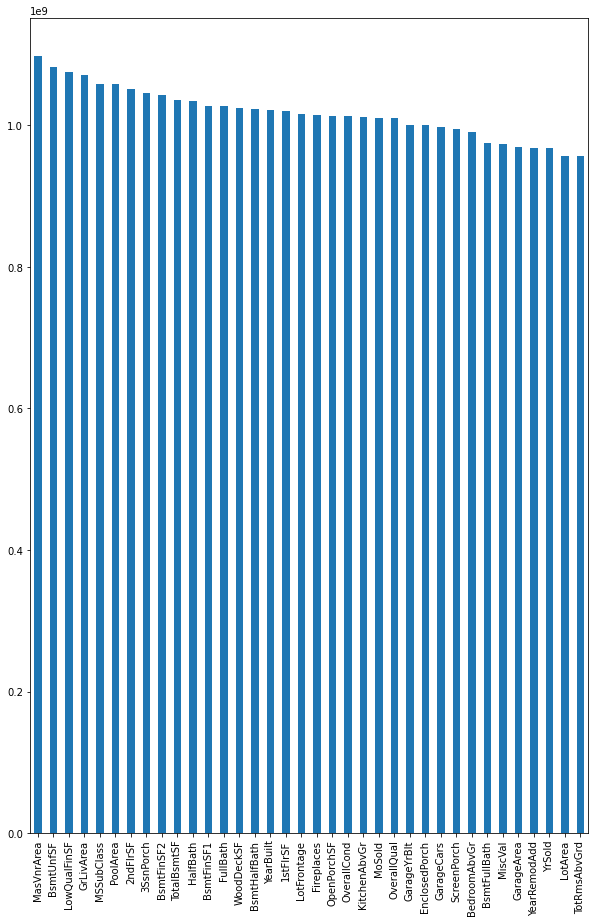

In [17]:
mse_values.sort_values(ascending=False).plot.bar(figsize=(10,15))